# Exercício 2 


* Avalie o uso de filtros para eliminar ruídos e detectar contornos na imagem figs/11.jpg
* Utilize os padrões definidos em https://github.com/opencv/opencv/tree/master/data/haarcascades para criar dois classificadores, teste os classificadores com imagens aleatórias


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

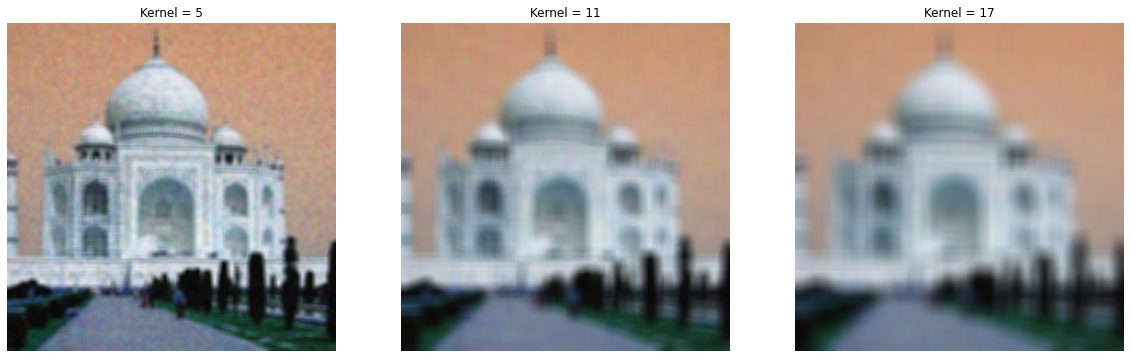

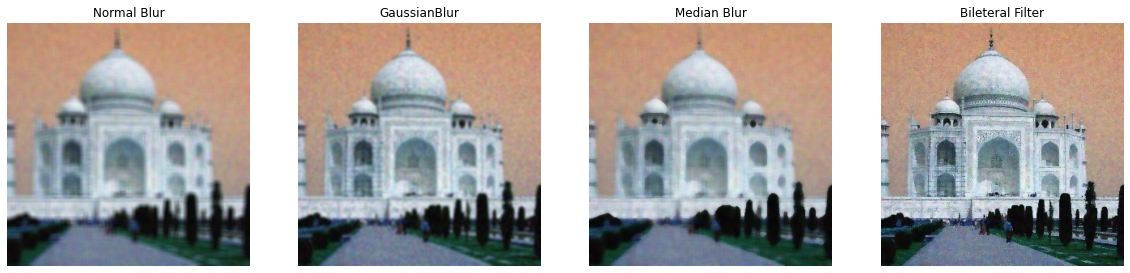

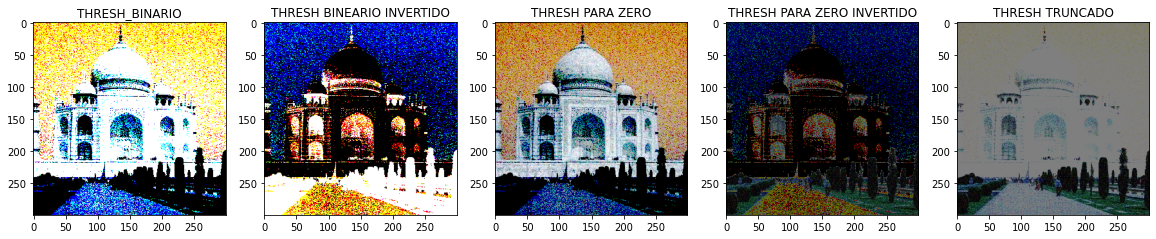

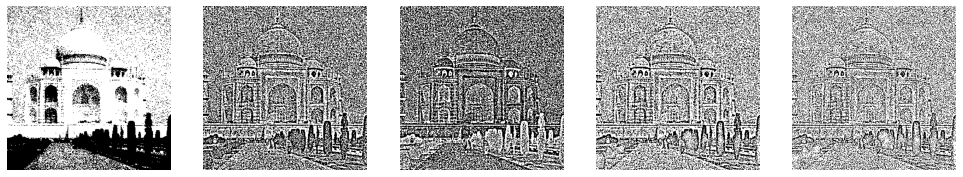

In [7]:
class setup_img(object):
    def __init__(self, path:str):
        self.path = path
        self.img = cv2.imread(self.path)
    ##################################
    def gray_convert(self, plot_pls:bool=False):
        self.img_gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        if plot_pls==True:
            plt.imshow(self.img_gray, cmap='gray')
        else:
            pass
    ####################################    
    def add_blur(self):
        kernels = [5, 11, 17]
        fig, axs = plt.subplots(nrows = 1,
                               ncols = 3,
                               figsize = (20, 20))
        for idx, s in enumerate(kernels):
            img_blurred = cv2.blur(self.img, ksize = (s, s))
            ax = axs[idx]
            title = 'Kernel = ' + str(kernels[idx])
            ax.set_title(title)
            ax.imshow(img_blurred)
            ax.axis('off')
        plt.show()
    ###################################
    def add_blur_2(self):
        n_blur = cv2.blur(self.img, ksize = (7,7))
        g_blur = cv2.GaussianBlur(self.img, ksize = (7, 7), sigmaX = 0)
        m_blur = cv2.medianBlur(self.img, 7)
        b_blur = cv2.bilateralFilter(self.img, 7, sigmaSpace = 75, sigmaColor = 75)
        blur_pack = [n_blur, g_blur, m_blur, b_blur]
        blur_names = ['Normal Blur', 'GaussianBlur', 'Median Blur', 'Bileteral Filter']
        fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20,20))
        for idx, n in enumerate(blur_pack):
            ax = axs[idx]
            ax.set_title(blur_names[idx])
            ax.imshow(n)
            ax.axis('off')
            
            
    def Thresholding_pls(self):
        thresh_pack = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV, cv2.THRESH_TRUNC]
        thresh_names = ['THRESH_BINARIO', 'THRESH BINEARIO INVERTIDO', 'THRESH PARA ZERO', 'THRESH PARA ZERO INVERTIDO', 'THRESH TRUNCADO']
        fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))
        for idx, t in enumerate(thresh_pack):
            _, thresh = cv2.threshold(self.img, 127, 255, t)
            ax = axs[idx]
            ax.set_title(thresh_names[idx])
            ax.imshow(thresh)
        plt.show()
            
    
    def Thresholding_pls_2(self):
        self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        _, thresh_binary = cv2.threshold(self.img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
        adap_mean_2 = cv2.adaptiveThreshold(self.img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 2)
        adap_mean_2_inv = cv2.adaptiveThreshold(self.img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 2)
        adap_mean_8 = cv2.adaptiveThreshold(self.img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 8)
        adap_gaussian_8 = cv2.adaptiveThreshold(self.img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 8)
        thresh_pack_2 = [thresh_binary, adap_mean_2,adap_mean_2_inv, adap_mean_8, adap_gaussian_8]
        fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (17, 17))
        for idx, t in enumerate(thresh_pack_2):
            ax = axs[idx]
            ax.imshow(t, cmap='gray')
            ax.axis('off')
        plt.show()
        
    
a = setup_img('introducao-CNN-master/figs/11.jpg') # Image path
a.gray_convert(plot_pls=False) ##
a.add_blur()####
a.add_blur_2()#######
a.Thresholding_pls()
a.Thresholding_pls_2()

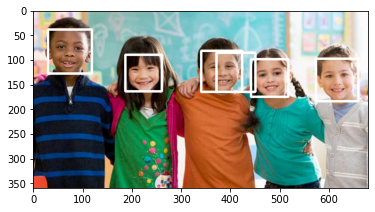

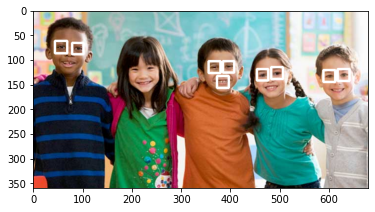

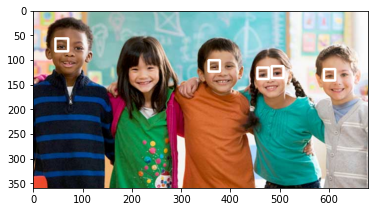

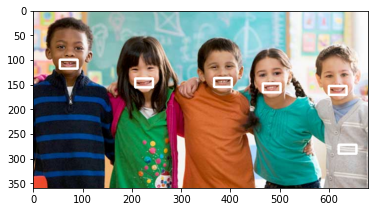

In [60]:
class detection_plis(object):
    def __init__(self, path:str):
        self.path = path
        self.img = cv2.imread(self.path)
        
    def detect_face(self):
        self.img_2 = self.img.copy()
        d_face = cv2.CascadeClassifier('introducao-CNN-master/opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
        face_rects = d_face.detectMultiScale(self.img_2, scaleFactor = 1.1, minNeighbors = 3)
        for (x,y,w,h) in face_rects:
            cv2.rectangle(self.img_2, (x,y), (x+w, y+h), (255, 255, 255), 3)
        self.img_2 = cv2.cvtColor(self.img_2, cv2.COLOR_BGR2RGB)
        plt.imshow(self.img_2, cmap='gray')
        plt.show()
    
    def detect_eye(self):
        self.img_2 = self.img.copy()
        d_eye = cv2.CascadeClassifier('introducao-CNN-master/opencv-master/data/haarcascades/haarcascade_eye.xml')
        eye_rects = d_eye.detectMultiScale(self.img_2, scaleFactor = 1.1, minNeighbors = 7)
        
        for (x,y,w,h) in eye_rects:
            cv2.rectangle(self.img_2, (x,y), (x+w, y+h), (255, 255, 255), 3)
        self.img_2 = cv2.cvtColor(self.img_2, cv2.COLOR_BGR2RGB)
        plt.imshow(self.img_2, cmap='gray')
        plt.show()
    
    def detect_right_eye(self):
        self.img_2 = self.img.copy()
        d_eye = cv2.CascadeClassifier('introducao-CNN-master/opencv-master/data/haarcascades/haarcascade_righteye_2splits.xml')
        eye_rects = d_eye.detectMultiScale(self.img_2, scaleFactor = 1.1, minNeighbors = 7)
        
        for (x,y,w,h) in eye_rects:
            cv2.rectangle(self.img_2, (x,y), (x+w, y+h), (255, 255, 255), 3)
        self.img_2 = cv2.cvtColor(self.img_2, cv2.COLOR_BGR2RGB)
        plt.imshow(self.img_2, cmap='gray')
        plt.show()
        
    
    def detect_smile(self):
        self.img_2 = self.img.copy()
        d_eye = cv2.CascadeClassifier('introducao-CNN-master/opencv-master/data/haarcascades/haarcascade_smile.xml')
        eye_rects = d_eye.detectMultiScale(self.img_2, scaleFactor = 4, minNeighbors = 10)
        
        for (x,y,w,h) in eye_rects:
            cv2.rectangle(self.img_2, (x,y), (x+w, y+h), (255, 255, 255), 3)
        self.img_2 = cv2.cvtColor(self.img_2, cv2.COLOR_BGR2RGB)
        plt.imshow(self.img_2, cmap='gray')
        plt.show()
        
        
        
a = detection_plis('introducao-CNN-master/figs/kids.jpg') #baby.png')#'introducao-CNN-master/figs/kids.jpg'
a.detect_face()
a.detect_eye()
a.detect_right_eye()
a.detect_smile()